### Fraudulent Credit Card Transactions Detection

In [ ]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from catboost import CatBoostClassifier
#import xgboost as xgb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
for column in df.columns:
    print('The number of unique values in column ' , column, ' is: ', df[column].nunique())

The number of unique values in column  Time  is:  124592
The number of unique values in column  V1  is:  275663
The number of unique values in column  V2  is:  275663
The number of unique values in column  V3  is:  275663
The number of unique values in column  V4  is:  275663
The number of unique values in column  V5  is:  275663
The number of unique values in column  V6  is:  275663
The number of unique values in column  V7  is:  275663
The number of unique values in column  V8  is:  275663
The number of unique values in column  V9  is:  275663
The number of unique values in column  V10  is:  275663
The number of unique values in column  V11  is:  275663
The number of unique values in column  V12  is:  275663
The number of unique values in column  V13  is:  275663
The number of unique values in column  V14  is:  275663
The number of unique values in column  V15  is:  275663
The number of unique values in column  V16  is:  275663
The number of unique values in column  V17  is:  275663


In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
percentage_fraudulent = 100 * df[df.Class == 1].shape[0]/df[df.Class == 0].shape[0]
print('The percentage of fraudulent transactions is : %.2f percent' % percentage_fraudulent )

The percentage of fraudulent transactions is : 0.17 percent


In [ ]:
features_list = list(df.columns)
features_list.remove("Class")
print(features_list)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [ ]:
corr_Class = df.corr()['Class']
print(corr_Class)

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64


In [ ]:
corr_Class = corr_Class[:-1].abs().sort_values(ascending = False)
corr_Class

V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64

In [ ]:
relevant_features = list(corr_Class[np.abs(corr_Class) > 0.09].index)
print(relevant_features)

['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18', 'V1', 'V9', 'V5', 'V2']


In [ ]:
X = df.loc[:, relevant_features]
y = df['Class']
print('Shape of X: ' , X.shape)
print('Shape of y: ' , y.shape)

Shape of X:  (284807, 14)
Shape of y:  (284807,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('Shape of X_train: ' , X_train.shape)
print('Shape of y_train: ' , y_train.shape)
print('\nShape of X_test: ' , X_test.shape)
print('Shape of y_test: ' , y_test.shape)

Shape of X_train:  (213605, 14)
Shape of y_train:  (213605,)

Shape of X_test:  (71202, 14)
Shape of y_test:  (71202,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
print('Shape of X_train_scaled: ' , X_train_scaled.shape)

Shape of X_train_scaled:  (213605, 14)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=0)
rf.fit(X_train_scaled,y_train)

# We shouldn't forget to use the standard scaler to transform the features of the test set
X_test_scaled = sc.transform(X_test)
y_pred_rf = rf.predict(X_test_scaled)


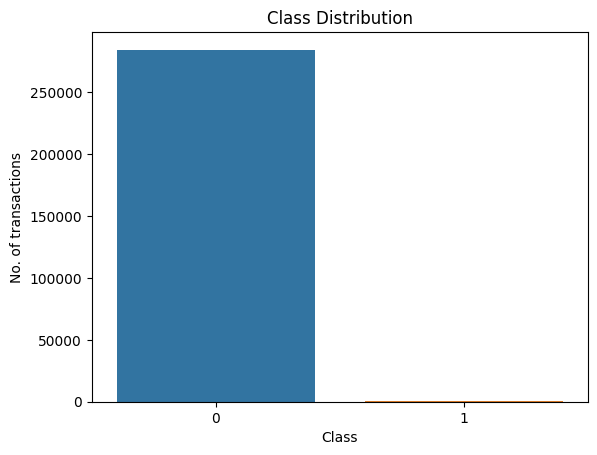

In [ ]:
sns.countplot(x = 'Class', data = df)
# df["Class"].value_counts().plot(kind = "bar")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("No. of transactions")
plt.show()

Out of 284807 transactions, only 492 are fraudulent. Thus, the dataset is highly imbalanced.

Feature Correlation

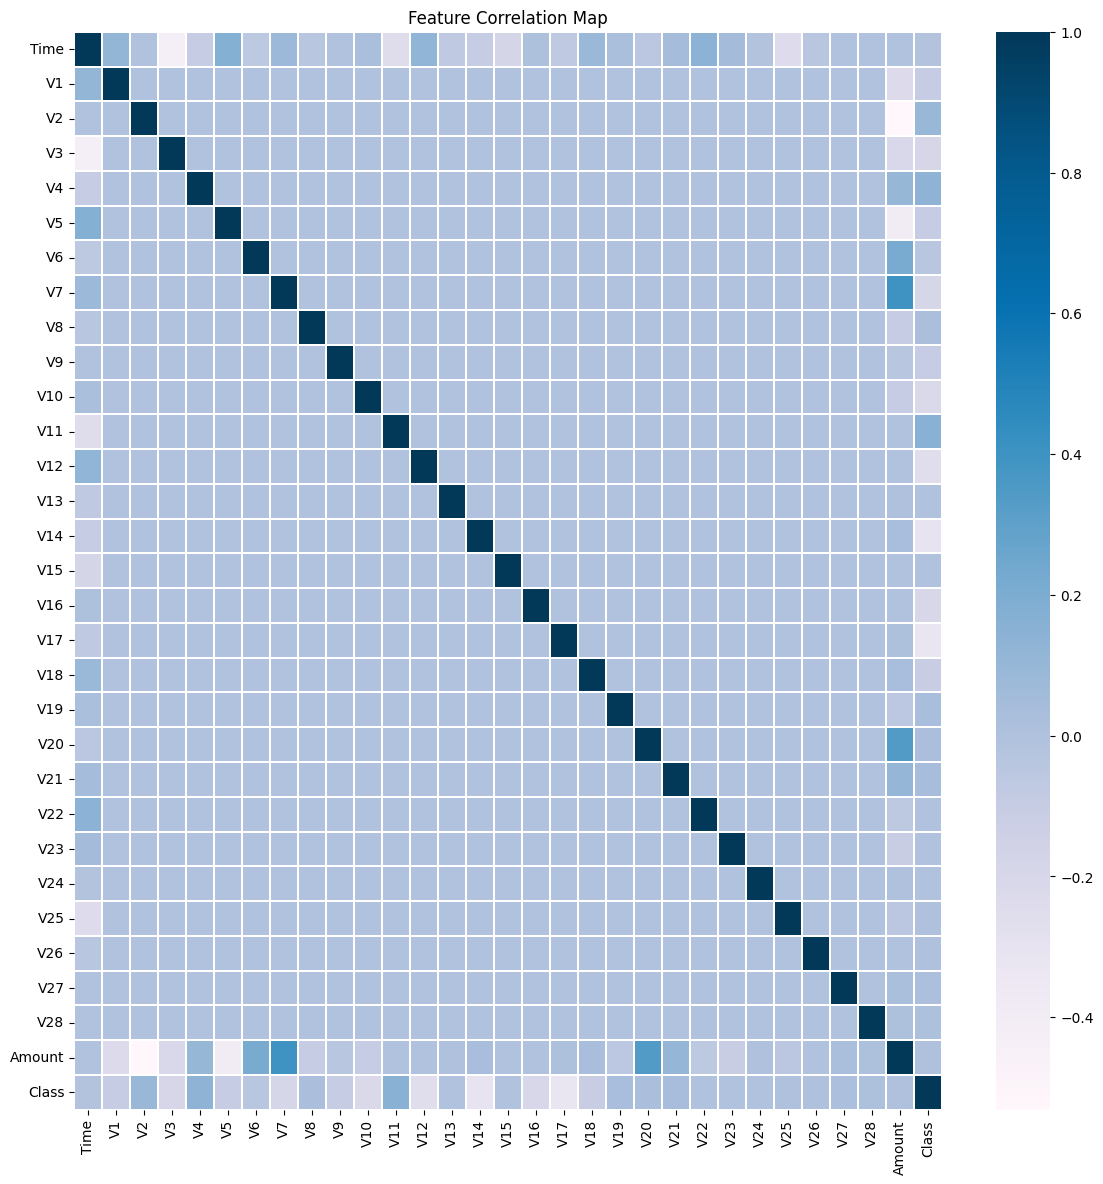

In [ ]:
plt.figure(figsize = (14, 14))
plt.title("Feature Correlation Map")
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = .1, cmap = "PuBu")
plt.show()

**Observations:**
* There is no notable correlation between features V1 to V28. 
* Time has inverse correlation with V3.
* Amount has direct correlation with V7 & V20 and inverse correlation with V2 & V5.

In [ ]:
# define predictors and target 
target = "Class"
# all columns except class
predictors = df.columns.tolist()[:-1]

In [ ]:
# split the data
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 42, shuffle = True)
train_df, valid_df = train_test_split(train_df, test_size = 0.2, random_state = 42, shuffle = True)

In [ ]:
x_train, x_valid, x_test = train_df[predictors], valid_df[predictors], test_df[predictors]
y_train, y_valid, y_test = train_df[target].values, valid_df[target].values, test_df[target].values

### Random Forest

In [ ]:
clf = RandomForestClassifier(n_jobs = 4,
                             random_state = 42,
                             criterion = "gini",
                             n_estimators = 100,
                             verbose = False)

In [ ]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=42, verbose=False)

In [ ]:
preds = clf.predict(valid_df[predictors])

In [ ]:
# clf.score(test_df[predictors], test_df[target].values)

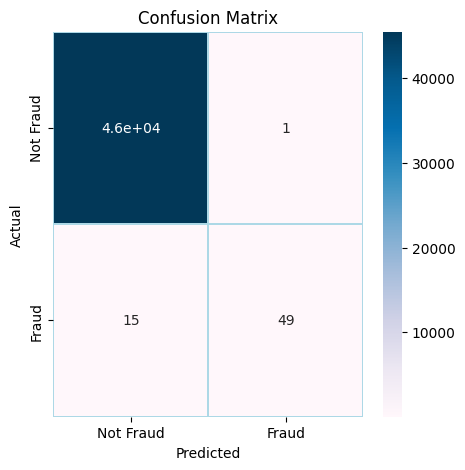

In [ ]:
# confusion matrix
cm = pd.crosstab(valid_df[target].values, preds, rownames = ['Actual'], colnames = ['Predicted'])
fig, ax1 = plt.subplots(ncols = 1, figsize = (5, 5))
sns.heatmap(cm, xticklabels = ["Not Fraud", "Fraud"], yticklabels = ["Not Fraud", "Fraud"], annot = True, ax = ax1, linewidth = .2, linecolor = "Lightblue", cmap = "PuBu")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# area under curve
roc_auc_score(valid_df[target].values, preds)

ImportError: ignored

### AdaBoost

In [ ]:
clf = AdaBoostClassifier(random_state = 42, algorithm = "SAMME.R", learning_rate = 0.8, n_estimators = 100)

In [ ]:
clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

In [ ]:
preds = clf.predict(x_valid)

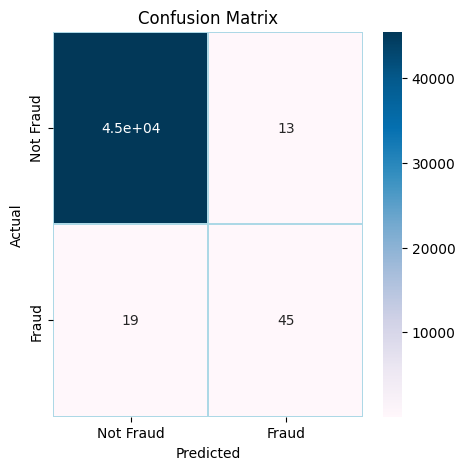

In [ ]:
# confusion matrix
cm = pd.crosstab(y_valid, preds, rownames = ['Actual'], colnames = ['Predicted'])
fig, ax1 = plt.subplots(ncols = 1, figsize = (5, 5))
sns.heatmap(cm, xticklabels = ["Not Fraud", "Fraud"], yticklabels = ["Not Fraud", "Fraud"], annot = True, ax = ax1, linewidth = .2, linecolor = "Lightblue", cmap = "PuBu")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# area under curve
roc_auc_score(y_valid, preds)

0.851419658554005

### CatBoost

In [ ]:
clf = CatBoostClassifier(iterations = 500, learning_rate = 0.02, depth = 12,
                         eval_metric = "AUC", random_seed = 42, bagging_temperature = 0.2,
                         od_type = "Iter", metric_period = 50, od_wait = 100)

In [ ]:
clf.fit(x_train, y_train, verbose = True)

0:	total: 431ms	remaining: 3m 35s
50:	total: 17.6s	remaining: 2m 35s
100:	total: 34.4s	remaining: 2m 15s
150:	total: 51.2s	remaining: 1m 58s
200:	total: 1m 7s	remaining: 1m 40s
250:	total: 1m 24s	remaining: 1m 23s
300:	total: 1m 40s	remaining: 1m 6s
350:	total: 1m 57s	remaining: 50.1s
400:	total: 2m 14s	remaining: 33.2s
450:	total: 2m 31s	remaining: 16.4s
499:	total: 2m 47s	remaining: 0us


In [ ]:
preds = clf.predict(x_valid)

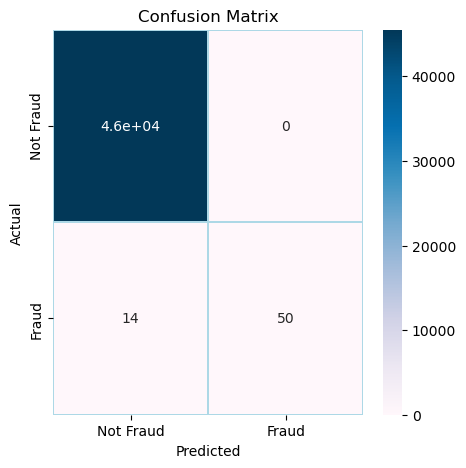

In [ ]:
# confusion matrix
cm = pd.crosstab(y_valid, preds, rownames = ['Actual'], colnames = ['Predicted'])
fig, ax1 = plt.subplots(ncols = 1, figsize = (5, 5))
sns.heatmap(cm, xticklabels = ["Not Fraud", "Fraud"], yticklabels = ["Not Fraud", "Fraud"], annot = True, ax = ax1, linewidth = .2, linecolor = "Lightblue", cmap = "PuBu")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# area under curve
roc_auc_score(y_valid, preds)

0.890625

### XGBoost

In [ ]:
train = xgb.DMatrix(x_train, y_train)
valid = xgb.DMatrix(x_valid, y_valid)
test = xgb.DMatrix(x_test, y_test)

# what to monitor 
watchlist = [(train, 'train'), (valid, 'valid')]

# xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = 42

In [ ]:
model = xgb.train(params, train, 1000, watchlist,
                  early_stopping_rounds = 50, maximize = True, verbose_eval = 50)

[17:46:00] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.88014	valid-auc:0.87486
[50]	train-auc:0.91941	valid-auc:0.92943
[88]	train-auc:0.92212	valid-auc:0.92915


In [ ]:
preds = model.predict(test)

In [ ]:
# area under curve
roc_auc_score(y_test, preds)

0.9331242714446498

### LightGBM

In [ ]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  
          'max_depth': 4,  
          'min_child_samples': 100,  
          'max_bin': 100,  
          'subsample': 0.9,  
          'subsample_freq': 1,  
          'colsample_bytree': 0.7,  
          'min_child_weight': 0,  
          'min_split_gain': 0,  
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, 
         }

In [ ]:
train = lgb.Dataset(x_train.values, y_train, feature_name = predictors)
valid = lgb.Dataset(x_valid.values, y_valid, feature_name = predictors)
evals_result = {}

In [ ]:
model = lgb.train(params, train, valid_sets = [train, valid],
                  valid_names = ['train', 'valid'], evals_result = evals_result,
                  num_boost_round = 1000, early_stopping_rounds = 100,
                  verbose_eval = 50, feval = None)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042678 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 100 rounds
[50]	train's auc: 0.987274	valid's auc: 0.894282
[100]	train's auc: 0.987737	valid's auc: 0.85291
Early stopping, best iteration is:
[1]	train's auc: 0.948018	valid's auc: 0.928341


In [ ]:
preds = model.predict(x_test)

In [ ]:
# area under curve
roc_auc_score(y_test, preds)

0.9319442271140308

### Results
* Random Forest: 0.88
* AdaBoost: 0.85
* CatBoost: 0.89
* XGBoost: 0.93
* LightGBM: 0.93